In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from sklearn.preprocessing import MinMaxScaler

2023-09-17 19:54:52.461011: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-17 19:54:52.486507: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-17 19:54:52.487373: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-17 19:54:53.016229: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df_FPT = pd.read_csv("FPT.csv",)
df_MSN = pd.read_csv("MSN.csv")
df_PNJ = pd.read_csv("PNJ.csv")
df_VIC = pd.read_csv("VIC.csv")

In [3]:
df_FPT.describe()

,Open,High,Low,Close,Volume,Open Interest
count,97406.000000,97406.000000,97406.000000,97406.000000,9.740600e+04,97406.0
mean,45.071630,45.090138,45.051430,45.071631,8.044173e+03,0.0
std,6.359803,6.364950,6.354245,6.359799,1.753203e+04,0.0
min,30.250000,30.250000,30.220000,30.250000,1.000000e+01,0.0
25%,39.740000,39.740000,39.700000,39.740000,7.500000e+02,0.0
50%,46.950000,46.950000,46.950000,46.950000,2.960000e+03,0.0
75%,49.200000,49.250000,49.170000,49.200000,8.960000e+03,0.0
max,58.400000,58.500000,58.400000,58.400000,1.255930e+06,0.0


In [4]:
regex_time = "\d{1,2}\/\d{1,2}\/\d{4}"

In [5]:
df_MSN.describe()

,Open,High,Low,Close,Volume,Open Interest
count,135354.000000,135354.000000,135354.000000,135354.000000,1.353540e+05,135354.0
mean,74.878809,74.931668,74.834625,74.880759,5.683578e+03,0.0
std,15.418074,15.426954,15.412677,15.418857,2.798513e+04,0.0
min,46.500000,46.500000,46.400000,46.400000,1.000000e+01,0.0
25%,57.900000,57.900000,57.800000,57.800000,5.000000e+02,0.0
50%,79.100000,79.200000,79.100000,79.100000,2.000000e+03,0.0
75%,86.000000,86.100000,86.000000,86.000000,5.560000e+03,0.0
max,117.800000,118.000000,117.700000,118.000000,3.300680e+06,0.0


In [6]:
df_PNJ.describe()

,Open,High,Low,Close,Volume,Open Interest
count,125309.000000,125309.000000,125309.000000,125309.000000,125309.000000,125309.0
mean,72.182052,72.372590,72.042287,72.179371,3031.830451,0.0
std,9.900263,9.995786,9.830847,9.899401,7248.952968,0.0
min,44.430000,44.530000,44.040000,44.140000,1.000000,0.0
25%,64.600000,64.700000,64.570000,64.600000,220.000000,0.0
50%,72.800000,73.010000,72.640000,72.830000,1000.000000,0.0
75%,80.160000,80.350000,80.060000,80.160000,3130.000000,0.0
max,100.160000,100.160000,100.160000,100.160000,580730.000000,0.0


In [7]:
df_VIC.describe()

,Open,High,Low,Close,Volume,Open Interest
count,101266.000000,101266.000000,101266.000000,101266.000000,1.012660e+05,101266.0
mean,105.376460,105.418519,105.334147,105.378791,3.182640e+03,0.0
std,11.543158,11.535584,11.552338,11.545054,1.469814e+04,0.0
min,68.000000,68.000000,68.000000,68.000000,1.000000e+01,0.0
25%,95.400000,95.400000,95.300000,95.400000,2.300000e+02,0.0
50%,105.300000,105.300000,105.200000,105.300000,1.020000e+03,0.0
75%,115.800000,115.900000,115.800000,115.800000,3.000000e+03,0.0
max,126.100000,126.500000,126.100000,126.500000,1.468390e+06,0.0


In [8]:
df_MSN['Date/Time'] = df_MSN['Date/Time'].str.extract('('+regex_time+')')
df_PNJ['Date/Time'] = df_PNJ['Date/Time'].str.extract('('+regex_time+')')
df_VIC['Date/Time'] = df_VIC['Date/Time'].str.extract('('+regex_time+')')
df_FPT['Date/Time'] = df_FPT['Date/Time'].str.extract('('+regex_time+')')

In [9]:
df_MSN = df_MSN.drop_duplicates(subset = ["Date/Time"])
df_MSN = df_MSN.reset_index(drop=True)

df_PNJ = df_PNJ.drop_duplicates(subset = ["Date/Time"])
df_PNJ = df_PNJ.reset_index(drop=True)

df_VIC = df_VIC.drop_duplicates(subset = ["Date/Time"])
df_VIC = df_VIC.reset_index(drop=True)

df_FPT = df_FPT.drop_duplicates(subset = ["Date/Time"])
df_FPT = df_FPT.reset_index(drop=True)

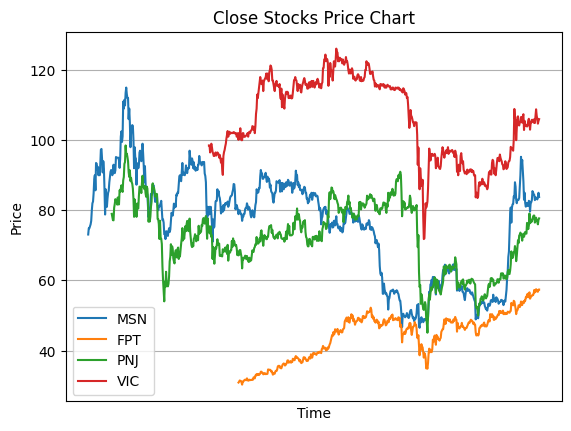

In [10]:

plt.plot(df_MSN["Date/Time"],df_MSN["Close"],label = "MSN")
plt.plot(df_FPT["Date/Time"],df_FPT["Close"], label = "FPT")
plt.plot(df_PNJ["Date/Time"],df_PNJ["Close"], label = "PNJ")
plt.plot(df_VIC["Date/Time"],df_VIC["Close"], label = "VIC")
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Close Stocks Price Chart")
plt.legend()
plt.grid(True)
plt.xticks([])
plt.show()

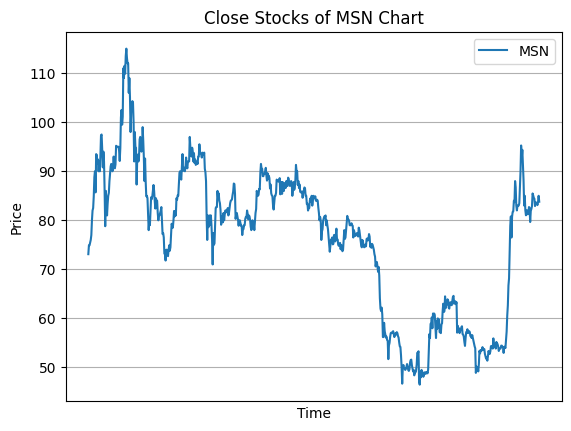

In [11]:
plt.plot(df_MSN["Date/Time"],df_MSN["Close"],label = "MSN")
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Close Stocks of MSN Chart")
plt.legend()
plt.grid(True)
plt.xticks([])
plt.show()

In [12]:
split_MSN = round(df_MSN.index[-1]*0.85)

In [13]:
data_MSN  = np.array(df_MSN["Close"]).reshape(-1,1)
time_MSN  = np.array(df_MSN.index.values.reshape(-1,1))

In [14]:
scalter = MinMaxScaler(feature_range=(0,10))
scalter_data_MSN  = scalter.fit_transform(data_MSN)
scalter_time_MSN  = scalter.fit_transform(time_MSN)

In [15]:
y_train_MSN , y_test_MSN  = scalter_data_MSN [0:split_MSN], scalter_data_MSN[split_MSN :-1]
X_train_MSN , X_test_MSN   = scalter_time_MSN [0:split_MSN], scalter_time_MSN[split_MSN :-1]

In [16]:
y_train_MSN.shape, X_train_MSN.shape

((635, 1), (635, 1))

In [17]:
X_train_MSN  =  np.reshape(X_train_MSN ,(X_train_MSN.shape[0],X_train_MSN.shape[1],1))

In [18]:
model = keras.models.Sequential()

In [19]:
model.add(keras.layers.LSTM(128,input_shape = (X_train_MSN.shape[1],1)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units = 1))

In [20]:
model.compile(optimizer='adam',loss='mse')
model.fit(X_train_MSN,y_train_MSN,epochs=100)

Epoch 1/100
20/20 [==============================] - 1s 1ms/step - loss: 22.3367
Epoch 2/100
20/20 [==============================] - 0s 1ms/step - loss: 18.7378
Epoch 3/100
20/20 [==============================] - 0s 1ms/step - loss: 15.9029
Epoch 4/100
20/20 [==============================] - 0s 1ms/step - loss: 14.0916
Epoch 5/100
20/20 [==============================] - 0s 1ms/step - loss: 13.0351
Epoch 6/100
20/20 [==============================] - 0s 1ms/step - loss: 12.2197
Epoch 7/100
20/20 [==============================] - 0s 1ms/step - loss: 11.2207
Epoch 8/100
20/20 [==============================] - 0s 1ms/step - loss: 10.2744
Epoch 9/100
20/20 [==============================] - 0s 1ms/step - loss: 9.2863
Epoch 10/100
20/20 [==============================] - 0s 1ms/step - loss: 8.2587
Epoch 11/100
20/20 [==============================] - 0s 1ms/step - loss: 7.2456
Epoch 12/100
20/20 [==============================] - 0s 1ms/step - loss: 6.2492
Epoch 13/100
20/20 [=========

In [21]:
loss_MSN = model.evaluate(X_test_MSN,y_test_MSN)
accuaracy_MSN = 100-loss_MSN
accuaracy_MSN

4/4 [==============================] - 0s 1ms/step - loss: 14.0044


85.99560356140137

In [22]:
predic_to_time_MSN = scalter_time_MSN[0:50] + 10
time_pre_MSN = time_MSN[1:51] + time_MSN[-1]

In [23]:
pre_MSN = []
for i in range(0,predic_to_time_MSN.shape[0]):
   pre_MSN.append(model.predict([predic_to_time_MSN])[i])

2/2 [==============================] - 0s 2ms/step


In [24]:
time_pre_MSN = np.array(time_pre_MSN)
time_MSN = np.concatenate((time_MSN,time_pre_MSN),axis = 0)

In [25]:
pre_MSN = np.array(data_MSN[-1] + pre_MSN)
data_MSN = np.concatenate((data_MSN,pre_MSN),axis= 0)

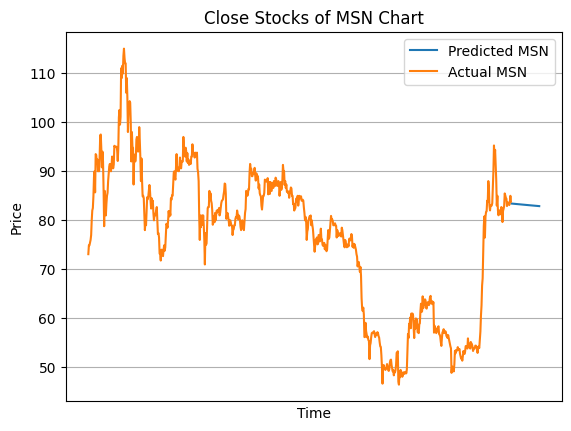

In [26]:
plt.plot(time_pre_MSN,pre_MSN,label = "Predicted MSN")
plt.plot(df_MSN["Close"], label = "Actual MSN")
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Close Stocks of MSN Chart")
plt.legend()
plt.grid(True)
plt.xticks([])
plt.show()

In [27]:
split_FPT = round(df_FPT.index[-1]*0.85)
data_FPT  = np.array(df_FPT["Close"]).reshape(-1,1)
time_FPT  = np.array(df_FPT.index.values.reshape(-1,1))
scalter_data_FPT  = scalter.fit_transform(data_FPT)
scalter_time_FPT  = scalter.fit_transform(time_FPT)
y_train_FPT , y_test_FPT  = scalter_data_FPT [0:split_FPT], scalter_data_FPT[split_FPT :-1]
X_train_FPT , X_test_FPT   = scalter_time_FPT [0:split_FPT], scalter_time_FPT[split_FPT :-1]
X_train_FPT  =  np.reshape(X_train_FPT ,(X_train_FPT.shape[0],X_train_FPT.shape[1],1))
model = keras.models.Sequential()
model.add(keras.layers.LSTM(128,input_shape = (X_train_FPT.shape[1],1)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units = 1))
model.compile(optimizer='adam',loss='mse')
model.fit(X_train_FPT,y_train_FPT,epochs=100)
loss_FPT = model.evaluate(X_test_FPT,y_test_FPT)
accuaracy_FPT = 100-loss_FPT
accuaracy_FPT

Epoch 1/100
14/14 [==============================] - 1s 2ms/step - loss: 23.8080
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 19.8812
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 15.9537
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 12.1745
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 8.4944
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 5.5661
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 3.5668
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 2.4805
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 2.1543
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: 2.1423
Epoch 11/100
14/14 [==============================] - 0s 2ms/step - loss: 2.0780
Epoch 12/100
14/14 [==============================] - 0s 2ms/step - loss: 1.9984
Epoch 13/100
14/14 [=============

93.30878019332886

In [28]:
predic_to_time_FPT = scalter_time_FPT[0:50] + 10
time_pre_FPT = time_FPT[1:51] + time_FPT[-1]
pre_FPT = []
for i in range(0,predic_to_time_FPT.shape[0]):
   pre_FPT.append(model.predict([predic_to_time_FPT])[i])


2/2 [==============================] - 0s 1ms/step


In [29]:
time_pre_FPT = np.array(time_pre_FPT)
time_FPT = np.concatenate((time_FPT,time_pre_FPT),axis = 0)

In [30]:
pre_FPT = np.array(data_FPT[-1] + pre_FPT)
data_FPT = np.concatenate((data_FPT,pre_FPT),axis= 0)


In [31]:
split_PNJ = round(df_PNJ.index[-1]*0.85)
data_PNJ  = np.array(df_PNJ["Close"]).reshape(-1,1)
time_PNJ  = np.array(df_PNJ.index.values.reshape(-1,1))
scalter_data_PNJ  = scalter.fit_transform(data_PNJ)
scalter_time_PNJ  = scalter.fit_transform(time_PNJ)
y_train_PNJ , y_test_PNJ  = scalter_data_PNJ [0:split_PNJ], scalter_data_PNJ[split_PNJ :-1]
X_train_PNJ , X_test_PNJ   = scalter_time_PNJ [0:split_PNJ], scalter_time_PNJ[split_PNJ :-1]
X_train_PNJ  =  np.reshape(X_train_PNJ ,(X_train_PNJ.shape[0],X_train_PNJ.shape[1],1))
model = keras.models.Sequential()
model.add(keras.layers.LSTM(128,input_shape = (X_train_PNJ.shape[1],1)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units = 1))
model.compile(optimizer='adam',loss='mse')
model.fit(X_train_PNJ,y_train_PNJ,epochs=100)
loss_PNJ = model.evaluate(X_test_PNJ,y_test_PNJ)
accuaracy_PNJ = 100-loss_PNJ
accuaracy_PNJ

Epoch 1/100
19/19 [==============================] - 1s 2ms/step - loss: 28.6125
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 23.8815
Epoch 3/100
19/19 [==============================] - 0s 1ms/step - loss: 19.1268
Epoch 4/100
19/19 [==============================] - 0s 1ms/step - loss: 14.7870
Epoch 5/100
19/19 [==============================] - 0s 1ms/step - loss: 11.8737
Epoch 6/100
19/19 [==============================] - 0s 1ms/step - loss: 10.5706
Epoch 7/100
19/19 [==============================] - 0s 1ms/step - loss: 10.0052
Epoch 8/100
19/19 [==============================] - 0s 1ms/step - loss: 9.5017
Epoch 9/100
19/19 [==============================] - 0s 1ms/step - loss: 9.1057
Epoch 10/100
19/19 [==============================] - 0s 1ms/step - loss: 8.6619
Epoch 11/100
19/19 [==============================] - 0s 1ms/step - loss: 8.1349
Epoch 12/100
19/19 [==============================] - 0s 1ms/step - loss: 7.6418
Epoch 13/100
19/19 [==========

96.85390663146973

In [32]:
predic_to_time_PNJ = scalter_time_PNJ[0:50] + 10
time_pre_PNJ = time_PNJ[1:51] + time_PNJ[-1]
pre_PNJ = []
for i in range(0,predic_to_time_PNJ.shape[0]):
   pre_PNJ.append(model.predict([predic_to_time_PNJ])[i])

2/2 [==============================] - 0s 2ms/step


In [33]:
time_pre_PNJ = np.array(time_pre_PNJ)
time_PNJ = np.concatenate((time_PNJ,time_pre_PNJ),axis = 0)

In [34]:
pre_PNJ = np.array(data_PNJ[-1] + pre_PNJ)
data_PNJ = np.concatenate((data_PNJ,pre_PNJ),axis= 0)

In [35]:
split_VIC = round(df_VIC.index[-1]*0.85)
data_VIC  = np.array(df_VIC["Close"]).reshape(-1,1)
time_VIC  = np.array(df_VIC.index.values.reshape(-1,1))
scalter_data_VIC  = scalter.fit_transform(data_VIC)
scalter_time_VIC  = scalter.fit_transform(time_VIC)
y_train_VIC , y_test_VIC  = scalter_data_VIC [0:split_VIC], scalter_data_VIC[split_VIC :-1]
X_train_VIC , X_test_VIC   = scalter_time_VIC [0:split_VIC], scalter_time_VIC[split_VIC :-1]
X_train_VIC  =  np.reshape(X_train_VIC ,(X_train_VIC.shape[0],X_train_VIC.shape[1],1))
model = keras.models.Sequential()
model.add(keras.layers.LSTM(128,input_shape = (X_train_VIC.shape[1],1)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units = 1))
model.compile(optimizer='adam',loss='mse')
model.fit(X_train_VIC,y_train_VIC,epochs=100)
loss_VIC = model.evaluate(X_test_VIC,y_test_VIC)
accuaracy_VIC = 100-loss_VIC
accuaracy_VIC

Epoch 1/100
15/15 [==============================] - 1s 2ms/step - loss: 45.6244
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 40.6914
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 35.7895
Epoch 4/100
15/15 [==============================] - 0s 1ms/step - loss: 30.8429
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 25.7841
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 21.6406
Epoch 7/100
15/15 [==============================] - 0s 1ms/step - loss: 18.2669
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 16.3773
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 15.2068
Epoch 10/100
15/15 [==============================] - 0s 2ms/step - loss: 14.4439
Epoch 11/100
15/15 [==============================] - 0s 2ms/step - loss: 13.5310
Epoch 12/100
15/15 [==============================] - 0s 2ms/step - loss: 12.9160
Epoch 13/100
15/15 [=====

89.41364669799805

In [36]:
predic_to_time_VIC = scalter_time_VIC[0:50] + 10
time_pre_VIC = time_VIC[1:51] + time_VIC[-1]
pre_VIC = []
for i in range(0,predic_to_time_VIC.shape[0]):
   pre_VIC.append(model.predict([predic_to_time_VIC])[i])
   

2/2 [==============================] - 0s 1ms/step


In [37]:
   
time_pre_VIC = np.array(time_pre_VIC)
time_VIC = np.concatenate((time_VIC,time_pre_VIC),axis = 0)

In [38]:

pre_VIC = np.array(data_VIC[-1] + pre_VIC)
data_VIC = np.concatenate((data_VIC,pre_VIC),axis= 0)

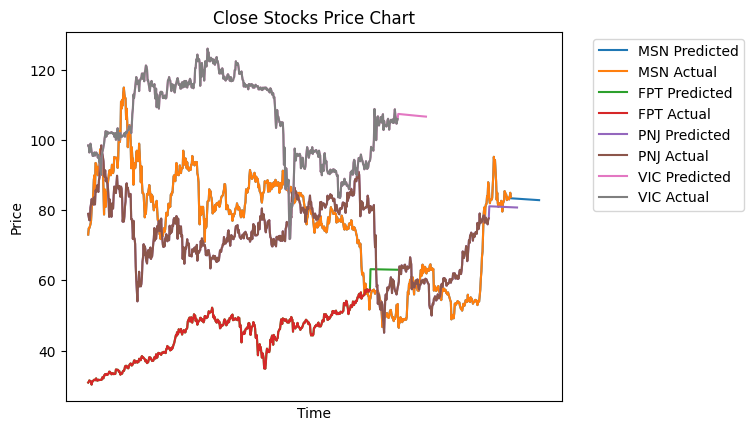

In [39]:



plt.plot(time_MSN,data_MSN,label = "MSN Predicted")
plt.plot(df_MSN["Close"], label = "MSN Actual")

plt.plot(time_FPT,data_FPT,label = "FPT Predicted")
plt.plot(df_FPT["Close"], label = "FPT Actual")

plt.plot(time_PNJ,data_PNJ,label = "PNJ Predicted")
plt.plot(df_PNJ["Close"], label = "PNJ Actual")

plt.plot(time_VIC,data_VIC,label = "VIC Predicted")
plt.plot(df_VIC["Close"], label = "VIC Actual")
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Close Stocks Price Chart")

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.xticks([])
plt.show()